In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.decomposition import PCA
import sklearn.datasets as datasets
from IPython.display import Image

<div class="alert alert-block alert-warning">

### Apply SVD on face images


</div>

## Read images into trian and test

In [2]:
data_dir = 'att_faces'

In [3]:
train_faces = []
test_faces = []
train_labels = []
test_labels = []
for i in range(1,41):
    current_dir = data_dir + '/s' +str(i)
    for j in range(1,8):
        current_image = current_dir + '/' +str(j) +'.pgm'
        im = cv2.imread(current_image,0)
        train_faces.append(im)
        train_labels.append(i)
    for j in range(8,11):
        current_image = current_dir + '/' +str(j) +'.pgm'
        im = cv2.imread(current_image,0)
        test_faces.append(im)
        test_labels.append(i)

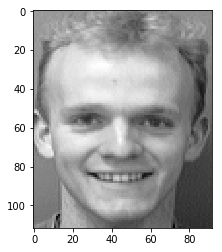

In [4]:
plt.imshow(train_faces[29],'gray')

In [5]:
train_faces = np.array(train_faces)
test_faces = np.array(test_faces)

In [6]:
train_faces = train_faces.reshape(train_faces.shape[0],train_faces.shape[1]*train_faces.shape[2])
test_faces = test_faces.reshape(test_faces.shape[0],test_faces.shape[1]*test_faces.shape[2])
np.shape(train_faces)

(280, 10304)

### Apply PCA on faces to obtain eigenvalues and eigenvectors

In [7]:
# Compute a PCA 
n_components = 50
pca = PCA(n_components=n_components, whiten=True).fit(train_faces)
 
# apply PCA transformation
X_train_pca = pca.transform(train_faces)
X_test_pca = pca.transform(test_faces)
np.shape(X_test_pca)

(120, 50)

In [8]:
eigenfaces = pca.components_.reshape(50,112,92)

In [9]:
eigenfaces.shape

(50, 112, 92)

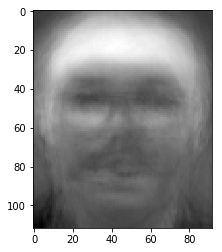

In [10]:
plt.imshow(eigenfaces[0],'gray')

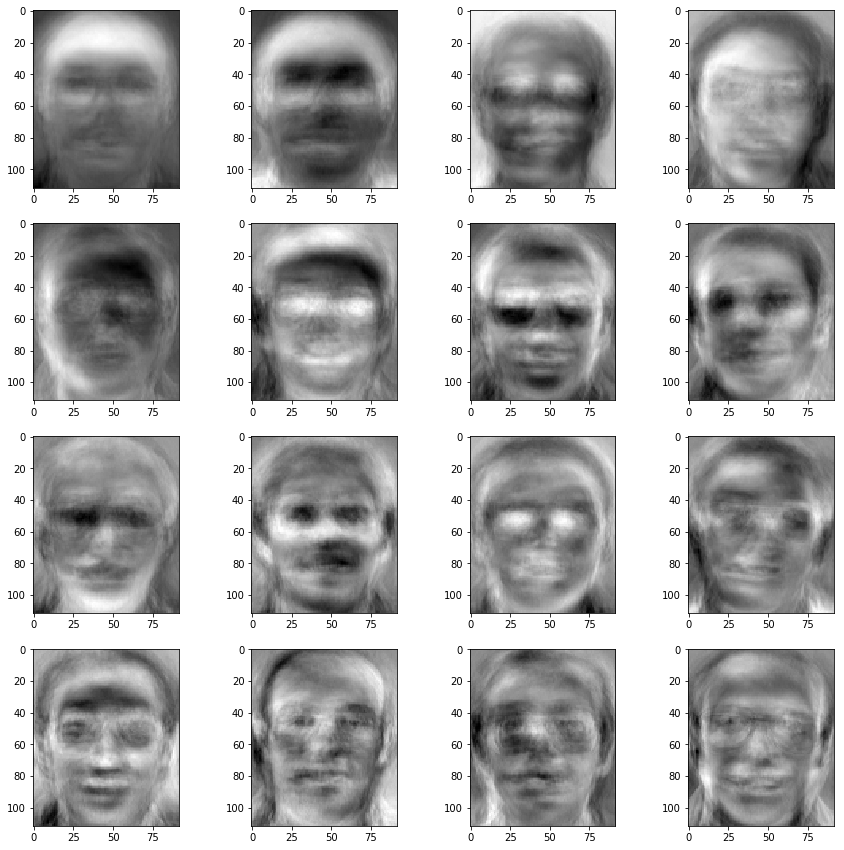

In [11]:
fix, ax = plt.subplots(4,4,figsize=(15,15))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(eigenfaces[i*4 + j],'gray')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task1

Find the eigenvectors (eigenfaces) and eigenvalues with SVD for the above face dataset

</div>


[2008571.48177852 2528459.17859272 1133708.2167699   948713.05204224
  896569.21719345  580787.63520455  491186.49656476  403668.16984072
  375492.22310382  298474.51685015  264420.92977858  223590.75009953
  196237.13960695  179646.49987565  160019.58118424  152285.48212279
  148876.27213914  143147.17741111  129906.98737808  126363.70736041
  121142.18656897  105792.45861369   99012.31319963   92680.04522949
   90453.15767318   87067.5500454    82616.9849679    81833.58358396
   79449.50381606   77667.96306118   72197.89136417   71026.04580639
   68337.12562699   65684.34430336   64018.42592573   60810.61876351
   59296.34832768   57368.25372341   54988.41756851   53753.55030529
   52180.95863581   50050.43542033   48953.55658064   47671.24858779
   46430.38967432   45312.03915132   44582.61910139   42437.37884071
   41813.83993167   39800.78769039]


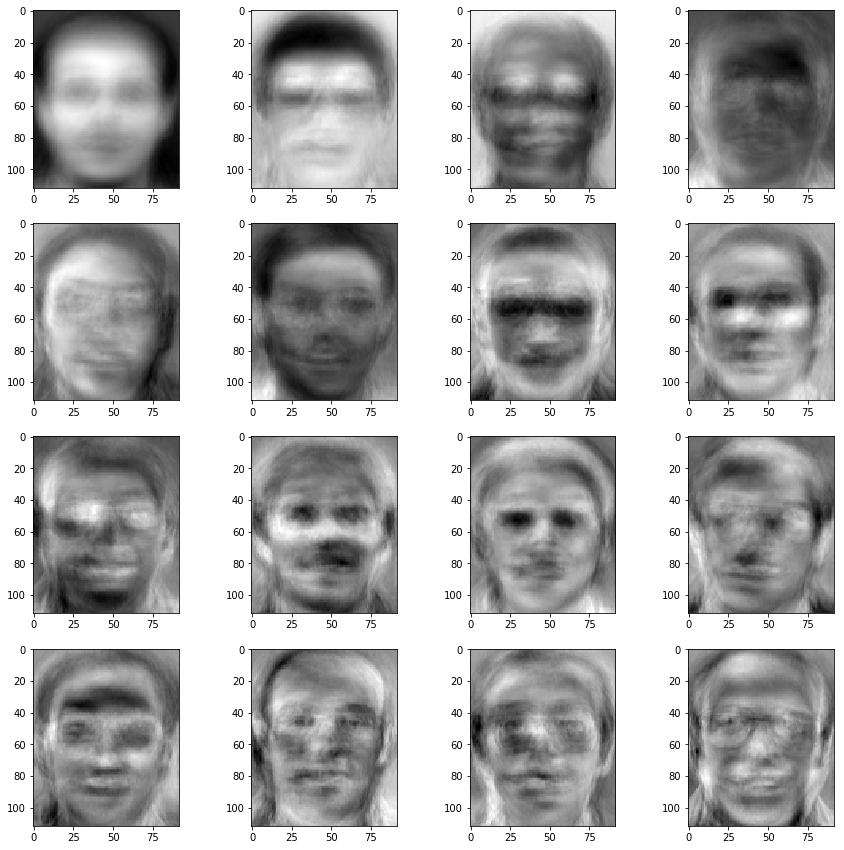

In [12]:
# PC1 * FACE1 = Alpha1, same but with SVD scipy.lingalg
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
svd.fit(train_faces)

eigenfaces = svd.components_.reshape(50,112,92)

fix, ax = plt.subplots(4,4,figsize=(15,15))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(eigenfaces[i*4 + j],'gray')
eigenvalues = svd.explained_variance_
print(eigenvalues)

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task2

Apply KNN, on the original faces and calculate the accuray for the test set

Apply KNN, on the reduced faces and calculate the accuray for the test set

compare results
</div>

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(train_faces, train_labels)
preds = neigh.predict(test_faces)
print(accuracy_score(test_labels, preds))

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_pca, train_labels)
preds = neigh.predict(X_test_pca)
print(accuracy_score(test_labels, preds))

0.95
0.875


<div class="alert alert-block alert-warning">

### Decision tree visualiztion and rules extraction


</div>

In [14]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

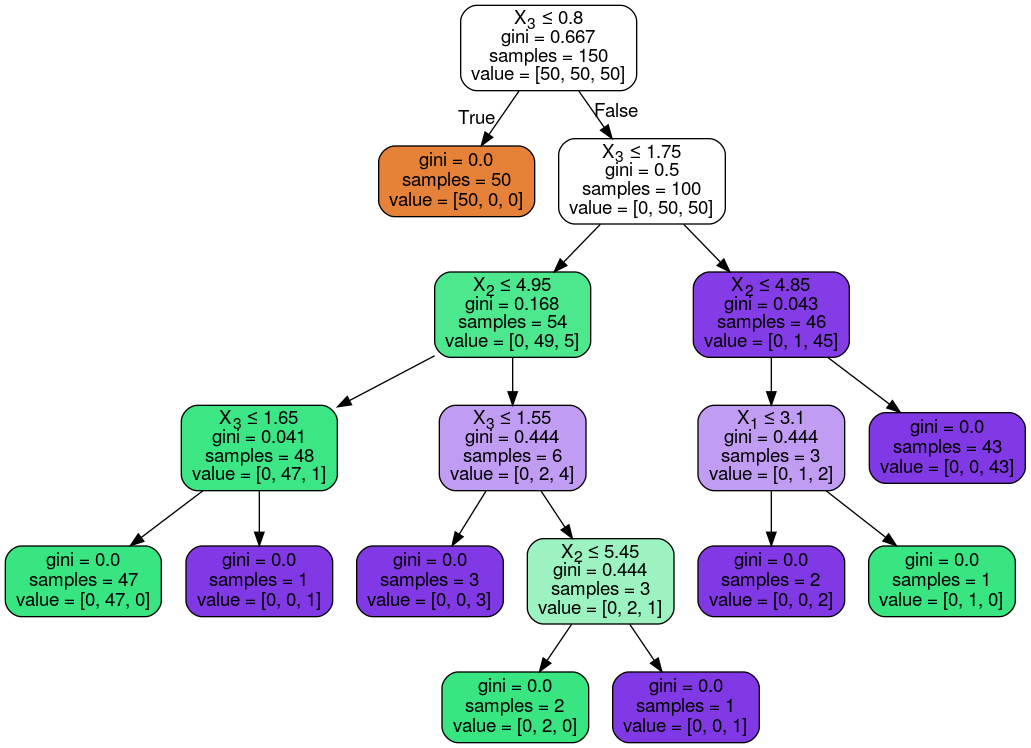

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task3

Find the two most important features according to the decision tree output.

</div>

In [18]:
# X2 X3

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task4

Having the two most important features from task2, create a parallel-axis representaion of them.

</div>

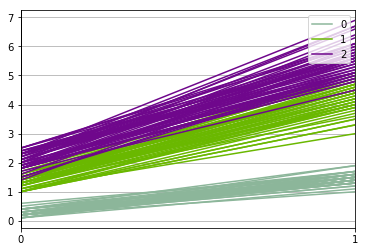

In [19]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

#df.keys()
#parallel_coordinates(df, 'sepal length (cm)')
a = list(zip(range(len(dtree.feature_importances_)), dtree.feature_importances_))
a.sort(key=lambda x:x[1])
f0 = a[-1][0]
f1 = a[-2][0]

datat = pd.DataFrame()
datat[0] = df[df.columns[f0]]
datat[1] = df[df.columns[f1]]
datat[2] = pd.Series(iris.target)
parallel_coordinates(datat, 2)

<div class="alert alert-block alert-warning">

### Bayesian Network


</div>

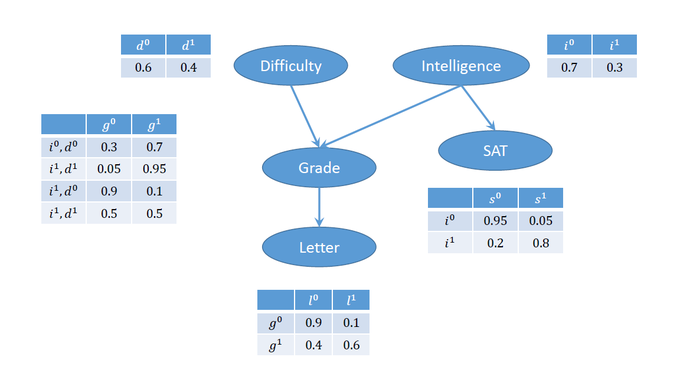

In [20]:
Image("Student model.png")

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task5

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Difficulty and Intelligence
- Join probability of Difficulty and Intelligence given Grade

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [21]:
# comment for Peyman: I had some issues with these following tasks so I did the first one without help
# of a framework and the rest using pgmpy, you approved when we met at your office, if you wish that
# i do all without framework please let me know.

In [22]:
# Starting with defining the network structure
from pgmpy.models import BayesianModel

student_model = BayesianModel([('D', 'G'), 
                              ('I', 'G'),
                              ('I', 'S'),
                              ('G', 'L')])

In [23]:
# Now defining the parameters.
from pgmpy.factors.discrete import TabularCPD

cpd_dif = TabularCPD(variable='D', variable_card=2,
                      values=[[0.6], [0.4]])

cpd_int = TabularCPD(variable='I', variable_card=2,
                       values=[[0.7], [0.3]])

cpd_gra = TabularCPD(variable='G', variable_card=2,
                        values=[[0.3, 0.05, 0.9, 0.5],
                                [0.7, 0.95, 0.1, 0.5]],
                        evidence=['D', 'I'],
                        evidence_card=[2, 2])

cpd_let = TabularCPD(variable='L', variable_card=2,
                      values=[[0.9, 0.4], [0.1, 0.6]],
                      evidence=['G'], evidence_card=[2])

cpd_sat = TabularCPD(variable='S', variable_card=2,
                      values=[[0.95, 0.2], [0.05, 0.8]],
                      evidence=['I'], evidence_card=[2])
I = [0.6, 0.4]
D = [0.7, 0.3]
G = [[0.3, 0.05, 0.9, 0.5],
     [0.7, 0.95, 0.1, 0.5]]
L = [[0.9, 0.4], [0.1, 0.6]]
S = [[0.95, 0.2], [0.05, 0.8]]

In [24]:
from pgmpy.inference import BeliefPropagation
from pgmpy.inference import VariableElimination
from pgmpy.inference import Inference

# Associating the parameters with the model structure.
student_model.add_cpds(cpd_dif,
                       cpd_int,
                       cpd_gra,
                       cpd_let,
                       cpd_sat)

# Checking if the cpds are valid for the model.
student_model.check_model()

# belief propagation
bp = BeliefPropagation(student_model)
bp.calibrate()

In [25]:
print("Joint probability of D and I")
for j in range(len(D)):
    for i in range(len(I)):
        print('i_{:} d_{:} = {:.2f}'.format(i, j, I[i]*D[j]))
print()

g0 = 0
for i in range(len(D)):
    for j in range(len(I)):
        g0 += I[j]*D[i]*G[0][i*2+j]
g1 = 0
for i in range(len(D)):
    for j in range(len(I)):
        g1 += I[j]*D[i]*G[1][i*2+j]

print("Joint probability of D and I given G")
print('g0')
for i in range(len(D)):
    for j in range(len(I)):
        print('i_{:} d_{:} = {:.2f}'.format(j, i, (I[j]*D[i]*G[0][i*2+j])/g0))

print("Joint probability of D and I given G")
print('g1')
for i in range(len(D)):
    for j in range(len(I)):
        print('i_{:} d_{:} = {:.2f}'.format(j, i, (I[j]*D[i]*G[1][i*2+j])/g1))

Joint probability of D and I
i_0 d_0 = 0.42
i_1 d_0 = 0.28
i_0 d_1 = 0.18
i_1 d_1 = 0.12

Joint probability of D and I given G
g0
i_0 d_0 = 0.35
i_1 d_0 = 0.04
i_0 d_1 = 0.45
i_1 d_1 = 0.17
Joint probability of D and I given G
g1
i_0 d_0 = 0.46
i_1 d_0 = 0.42
i_0 d_1 = 0.03
i_1 d_1 = 0.09


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task6

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Grade and SAT
- Join probability of Grade and SAT given Intelligence

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [26]:

# get phi of I and D given G
phi = bp.query(variables=['G', 'S'])

# since it's a joint prob, * G and S
print(phi)
print()

# get phi of G and D given G
phi = bp.query(variables=['G', 'S'],
           evidence={'I':0})

print(phi)
print()

# get phi of I and D given G
phi = bp.query(variables=['G', 'S'],
           evidence={'I':1})

print(phi)
print()

Eliminating: L: 100%|██████████| 2/2 [00:00<00:00, 332.41it/s]

+------+------+------------+
| G    | S    |   phi(G,S) |
+======+======+============+
| G(0) | S(0) |     0.3729 |
+------+------+------------+
| G(0) | S(1) |     0.0741 |
+------+------+------------+
| G(1) | S(0) |     0.3521 |
+------+------+------------+
| G(1) | S(1) |     0.2009 |
+------+------+------------+

+------+------+------------+
| G    | S    |   phi(G,S) |
+======+======+============+
| G(0) | S(0) |     0.3591 |
+------+------+------------+
| G(0) | S(1) |     0.0189 |
+------+------+------------+
| G(1) | S(0) |     0.3059 |
+------+------+------------+
| G(1) | S(1) |     0.0161 |
+------+------+------------+

+------+------+------------+
| G    | S    |   phi(G,S) |
+======+======+============+
| G(0) | S(0) |     0.0138 |
+------+------+------------+
| G(0) | S(1) |     0.0552 |
+------+------+------------+
| G(1) | S(0) |     0.0462 |
+------+------+------------+
| G(1) | S(1) |     0.1848 |
+------+------+------------+



<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task7

In the student model Bayesin network write codes to calculate the followings.

- Join probability of Letter and Difficulty
- Join probability of Letter and Difficulty Grade

For each of the two joint probability check to see if the joint probability can be factorized.

</div>

In [27]:
# get phi of I and D given G
phi = bp.query(variables=['L', 'D'])

# since it's a joint prob, * G and S
print(phi)
print()

# get phi of G and D given G
phi = bp.query(variables=['L', 'D'],
           evidence={'G':0})

print(phi)
print()

# get phi of I and D given G
phi = bp.query(variables=['L', 'D'],
           evidence={'G':1})

print(phi)
print()

Eliminating: I: 100%|██████████| 1/1 [00:00<00:00, 566.72it/s]

+------+------+------------+
| D    | L    |   phi(D,L) |
+======+======+============+
| D(0) | L(0) |     0.3075 |
+------+------+------------+
| D(0) | L(1) |     0.2925 |
+------+------+------------+
| D(1) | L(0) |     0.3160 |
+------+------+------------+
| D(1) | L(1) |     0.0840 |
+------+------+------------+

+------+------+------------+
| D    | L    |   phi(D,L) |
+======+======+============+
| D(0) | L(0) |     0.1215 |
+------+------+------------+
| D(0) | L(1) |     0.0135 |
+------+------+------------+
| D(1) | L(0) |     0.2808 |
+------+------+------------+
| D(1) | L(1) |     0.0312 |
+------+------+------------+

+------+------+------------+
| L    | D    |   phi(L,D) |
+======+======+============+
| L(0) | D(0) |     0.1860 |
+------+------+------------+
| L(0) | D(1) |     0.0352 |
+------+------+------------+
| L(1) | D(0) |     0.2790 |
+------+------+------------+
| L(1) | D(1) |     0.0528 |
+------+------+------------+

